In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import random
from queue import Queue

## EX1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import dbscan
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons

from queue import Queue


In [4]:

blobs = make_moons(500, noise=0.055)[0]

for x in range(2):
    m = blobs[:,x].mean()
    s = blobs[:,x].std()
    for y in range(len(blobs)):
        blobs[y,x] = (blobs[y,x] - m)/s

In [5]:
class dbscan2():
    def __init__(self,df, epsilon=1, min_points=5):
        self.df = np.array(df)
        self.epsilon = epsilon
        self.min_points = min_points
        self.cluster_label = 0
        self.noise = 0
        
    def fit(self):
        "Fit the data"
        
        # Create labels column initialized to -1 (unclassified)
        self.df = np.append(self.df, np.array([[-1]*len(blobs)]).reshape(-1,1), axis=1)
        
        for x in range(len(self.df)):
            
            # if the point is not labled already then search for neighbors
            if self.df[x,2] != -1:
                continue
            
            # find neighbors
            p = self.df[x,:2]
            neighbors = self.rangeQuery(p)
            
            # If less neighbors than min_points then label as noise and continue
            if len(neighbors) < self.min_points:
                self.df[x,2] = self.noise
                continue
            
            # increment cluster label
            self.cluster_label += 1

            # set current row to new cluster label
            self.df[x,2] = self.cluster_label

            # create seed set to hold all neighbors of cluster including the neighbors already found
            found_neighbors = neighbors
            
            # create Queue to fold all neighbors of cluster
            q = Queue()
            
            # add original neighbors
            for x in neighbors:
                q.put(x)
            
            # While isnt empty label new neighbors to cluster
            while q.empty() == False:
                
                current = q.get()
                
                # if cur_row labled noise then change to cluster label (border point)
                if self.df[current,2] == 0:
                    self.df[current,2] = self.cluster_label

                # If label is not -1(unclassified) then continue
                if self.df[current,2] != -1:
                    continue
                
                # label the neighbor
                self.df[current,2] = self.cluster_label

                # look for neightbors of cur_row
                point = self.df[current,:2]
                neighbors2 = self.rangeQuery(point)
                
                # if neighbors2 >= min_points then add those neighbors to seed_set
                if len(neighbors2) >= self.min_points:

                    for x in neighbors2:
                        if x not in found_neighbors:
                            q.put(x)
                            found_neighbors.append(x)  
                

    def predict(self, x):
        "Return the predicted labels"
        
        preds = []
        
        for point in x:
            neighbors = self.rangeQuery(point)
            label = self.df[neighbors[0],2]
            preds.append(label)
        
        return preds
    
    def rangeQuery(self, x):
        """Query database against x and return all points that are <= epsilon"""
        
        neighbors = []
        
        for y in range(len(self.df)):
            q = self.df[y, :2]
            if self.dist(x, q) <= self.epsilon:
                neighbors.append(y)
        
        return neighbors
    
    def dist(self, point1, point2):
        """Euclid distance function"""
        
        x1 = point1[0]
        x2 = point2[0]
        y1 = point1[1]
        y2 = point2[1]
        
        # create the points 
        p1 = (x1 - x2)**2
        p2 = (y1 - y2)**2

        return np.sqrt(p1 + p2)

In [7]:
tst = dbscan2(blobs, 0.2, 5)
tst.fit()

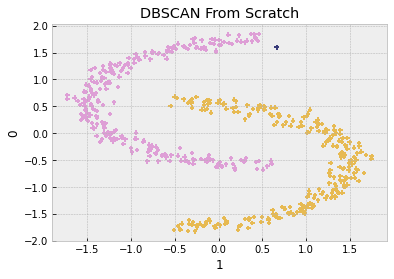

In [8]:
#Plot
plt.style.use("bmh")
pd.DataFrame(test.df).plot(x=1, y=0, kind="scatter", c=2, colorbar=False, title= "DBSCAN From Scratch", marker="+", colormap="tab20b")
plt.show()

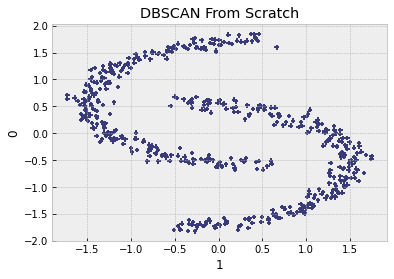

In [10]:
tst1 = dbscan2(blobs, 2, 10)
tst1.fit()
pd.DataFrame(tst1.df).plot(x=1, y=0, kind="scatter", c=2, colorbar=False, title= "DBSCAN From Scratch", marker="+", colormap="tab20b")
plt.show()

## EX2

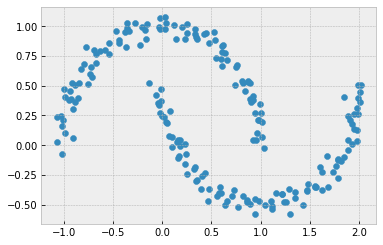

In [11]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])

In [12]:
scaler = StandardScaler()

In [13]:
# features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
Xstd = scaler.fit_transform(Xmoon)
# scaled_features = scaler.fit_transform(features)

## KNN

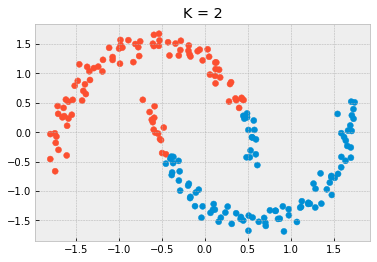

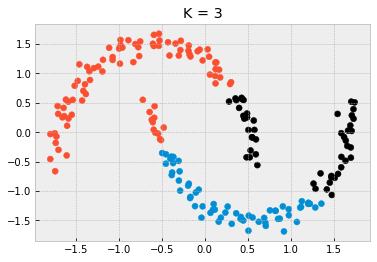

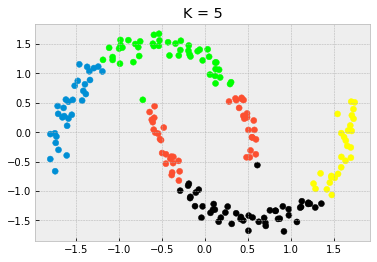

In [14]:
fte_colors = {0: "#008fd5", 1: "#fc4f30", 2: '#000000', 3: '#00FF00', 4: '#FFFF00', 5: '#FF00FF'}

for k in [2,3,5]:
  plt.figure()
  plt.title("K = {}".format(k))
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(Xstd)
  km_colors = [fte_colors[label] for label in kmeans.labels_]
  plt.scatter(Xstd[:, 0], Xstd[:, 1], c=km_colors)
# ax1.set_title( f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

## DBScan

In [15]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Xstd)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 13


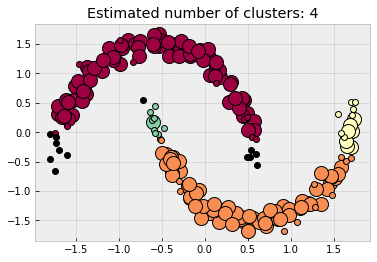

In [16]:
import matplotlib.pyplot as plt
# def plot_dbscan():
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = Xstd[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = Xstd[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [17]:
def dbscan(eps, min_samples):
  db = DBSCAN(eps=eps, min_samples=min_samples).fit(Xstd)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  print(n_clusters_, n_noise_)
  return n_clusters_, n_noise_, labels

In [18]:
def plot_dbscan(X, labels):
  # Black removed and is used for noise instead.
  unique_labels = set(labels)
  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
          # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = labels == k

      xy = X[class_member_mask & core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=14,
      )

      xy = X[class_member_mask & ~core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=6,
      )

  plt.title("Estimated number of clusters: %d" % n_clusters_)
  plt.show()

4 13


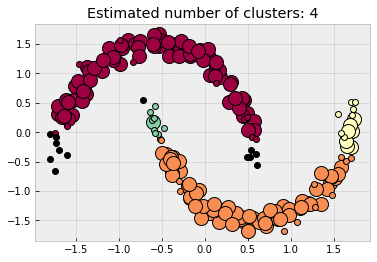

In [20]:
n_clusters_, n_noise_, labels = dbscan(eps=0.3, min_samples = 10)
plot_dbscan(Xstd, labels)

5 146


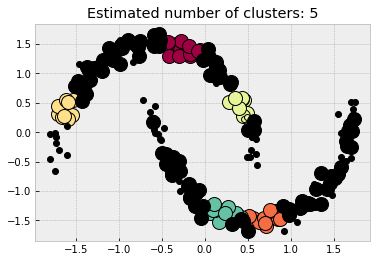

In [21]:
n_clusters_, n_noise_, labels= dbscan(eps=0.2, min_samples = 10)
plot_dbscan(Xstd, labels)


2 1


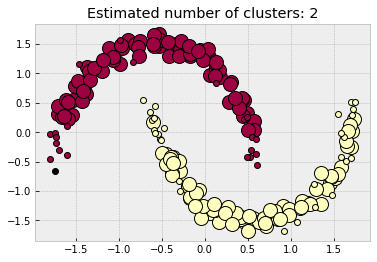

In [22]:
n_clusters_, n_noise_, labels= dbscan(eps=0.4, min_samples = 10)
plot_dbscan(Xstd, labels)

0 200


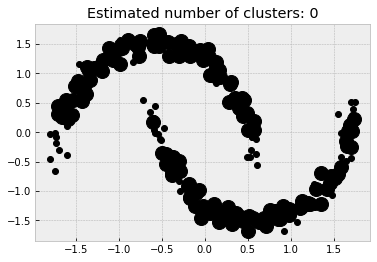

2 1


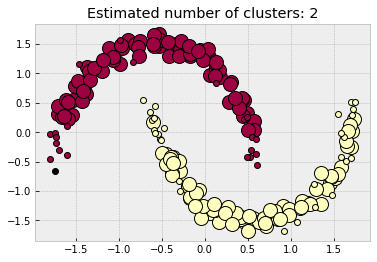

1 0


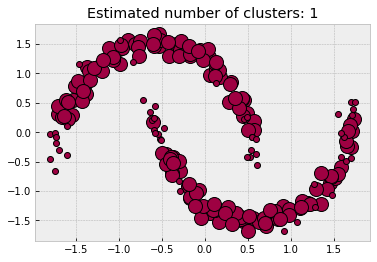

1 0


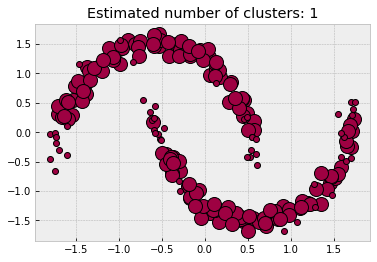

In [23]:
for e in [0.04, 0.4, 4, 40]:
  n_clusters_, n_noise_, labels= dbscan(eps=e, min_samples = 10)
  plot_dbscan(Xstd, labels)

2 0


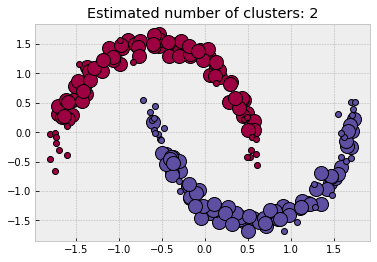

2 0


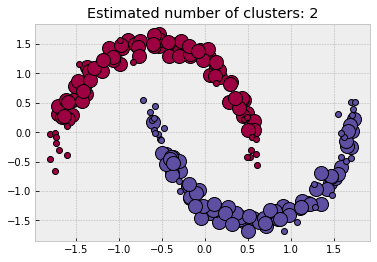

2 0


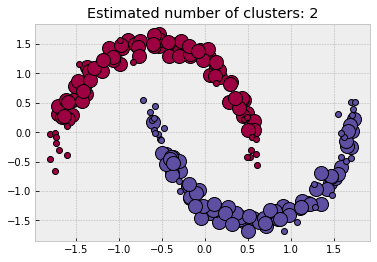

2 1


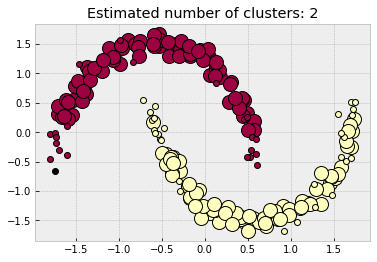

2 113


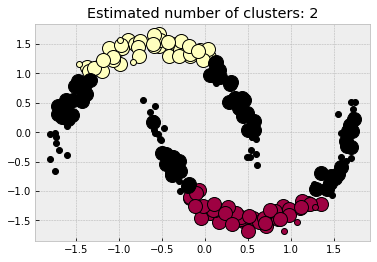

0 200


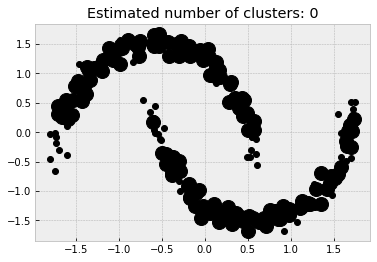

In [24]:
for m in [1,4, 5, 10, 20, 30]:
  n_clusters_, n_noise_, labels= dbscan(eps=0.4, min_samples = m)
  plot_dbscan(Xstd, labels)

1.radius \
Chỉ số này quá lớn sẽ khiến kéo nhiều điểm về cùng một nhóm và dẫn đến tình trạng tất cả data trong cùng 1 nhóm => vô nghĩa trong bài toán chia cụm \
Chỉ số này quá nhỏ sẽ khiến không có điểm nào nằm trong bán kính này và dẫn đến không chia được cụm \
2 Min sample là số lượng tối thiểu các điểm láng giềng xung quanh một điểm để xác định một điểm lõi, số lượng này đã bao gồm điểm lõi. Tương đương với minPts+1 \
Chỉ số này quá lớn => để quá nhiều điểm trong cụm
Chỉ số này quá nhỏ => quá ít điểm trong cụm